# Feature comparison between IDEAS, CP and SCIP features

In this notebook, we will compare feature sets generated using IDEAS, CellProfiler and SCIP. 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from scip_workflows.common import *

In [4]:
import seaborn
import fcsparser
from sklearn.preprocessing import scale
from scipy.stats import pearsonr, spearmanr
from scip_workflows import core

## Loading the three feature sets

In [7]:
try:
    features = snakemake.input.features
    index = snakemake.input.index
    columns = snakemake.input.columns
    ideas = snakemake.input.ideas
    labels = snakemake.input.labels
except NameError:
    data_root = Path("/home/maximl/scratch/data/vsc/datasets/wbc/")
    # data_root = Path(os.environ["VSC_DATA_VO_USER"]) / "datasets/wbc"
    data_scip = data_root / "scip/131020222139/"
    features = data_scip / "WBC_features.parquet"
    labels = data_scip / "labels.parquet"
    index = data_scip / "indices/index.npy"
    columns = data_scip / "indices/columns.npy"
    ideas = data_root / "ideas" / "WBC_ideas_features.parquet"

In [8]:
df_scip = pq.read_table(features).to_pandas()

df_scip = df_scip[numpy.load(columns, allow_pickle=True)]
df_scip = df_scip.loc[numpy.load(index, allow_pickle=True)]

labels = pq.read_table(labels).to_pandas()
df_scip = df_scip.merge(labels, left_index=True, right_index=True)
# df_scip["meta_label"] = pandas.Categorical(df_scip["meta_label"], ordered=True)

df_scip.shape

(220543, 6287)

In [10]:
df_ideas = pq.read_table(ideas).to_pandas()

# Comparing features between IDEAS and SCIP

In [77]:
df_joined = df_scip.rename(columns=lambda a: "scip_"+a).join(
    df_ideas.rename(columns=lambda a: "ideas_"+a), 
    how="inner"
)
df_joined.shape

(220543, 6632)

In [78]:
def rename(c):
    if c.startswith("scip_meta"):
        return "meta_" + c[10:]
    return c
df_joined = df_joined.rename(columns=rename)

In [79]:
def compare_features(df, x1, x2):
    fig, ax = plt.subplots(dpi=150)
    ax.set_xlabel(x1)
    ax.set_ylabel(x2)
    sorted_index = df[x1].sort_values().index
    z1 = df[x1]
    z2 = df[x2]

    # sorted_index = numpy.argsort(z1)
    # z = numpy.polyfit(z1, z2, 1)
    # y_hat = numpy.poly1d(z)(z1[sorted_index])
    # ax.plot(z1[sorted_index], y_hat, "--", lw=0.5, color="grey")
    ax.scatter(z1.loc[sorted_index], z2.loc[sorted_index], s=0.5, alpha=0.5, edgecolors="none")
    # ax.set_title(r'pearson = %.4f, spearman = %.4f' % (pearsonr(z1,z2)[0], spearmanr(z1,z2)[0]))
    
    return ax

### Texture

<AxesSubplot:xlabel='ideas_feat_hcontrastmeanm06ssc5', ylabel='scip_feat_li_glcm_mean_homogeneity_5_SSC'>

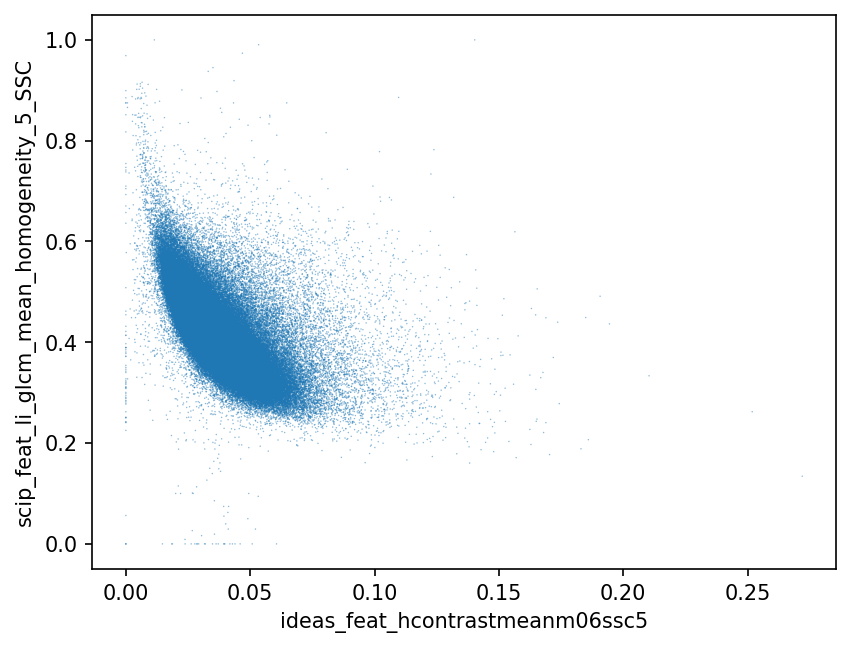

In [80]:
compare_features(df_joined, "ideas_feat_hcontrastmeanm06ssc5", "scip_feat_li_glcm_mean_homogeneity_5_SSC")

### Shape

<AxesSubplot:xlabel='ideas_feat_circularitym01', ylabel='scip_feat_li_eccentricity_BF1'>

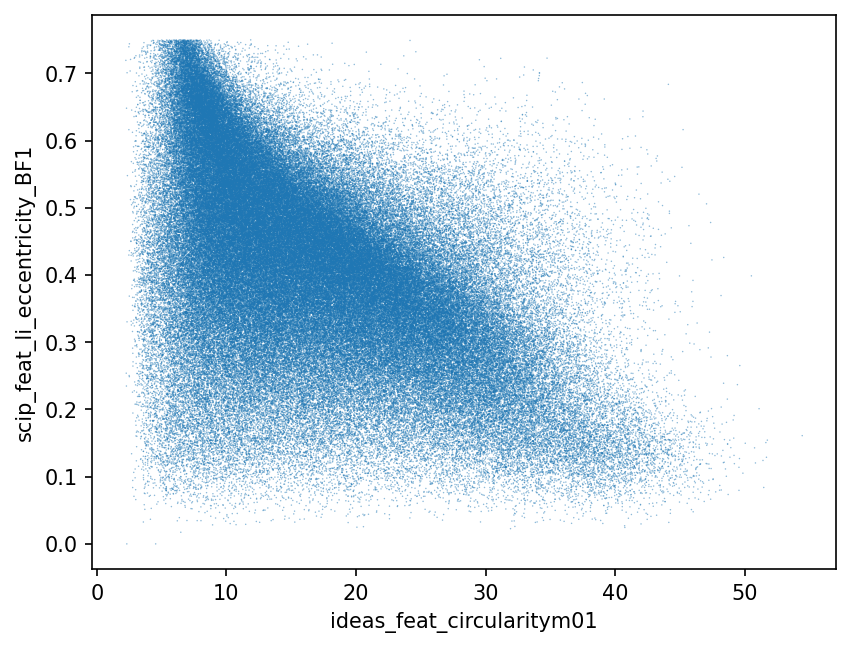

In [82]:
compare_features(df_joined, "ideas_feat_circularitym01", "scip_feat_li_eccentricity_BF1")

<AxesSubplot:xlabel='ideas_feat_majoraxism01', ylabel='scip_feat_li_major_axis_length_BF1'>

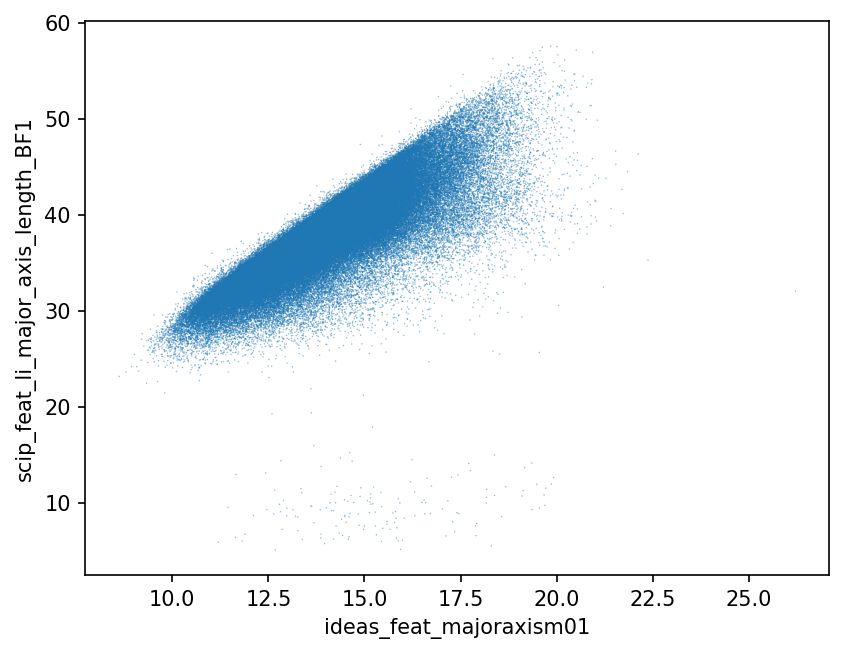

In [84]:
compare_features(df_joined, "ideas_feat_majoraxism01", "scip_feat_li_major_axis_length_BF1")

<AxesSubplot:xlabel='ideas_feat_aream01', ylabel='scip_feat_li_area_BF1'>

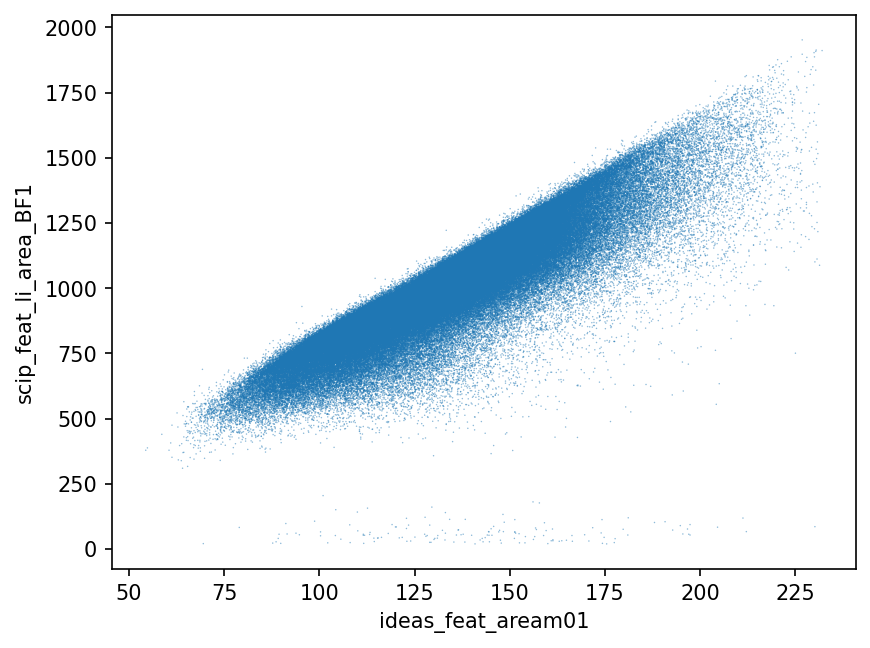

In [85]:
compare_features(df_joined, "ideas_feat_aream01", "scip_feat_li_area_BF1")

<AxesSubplot:xlabel='ideas_feat_aream02', ylabel='scip_feat_li_area_CD15'>

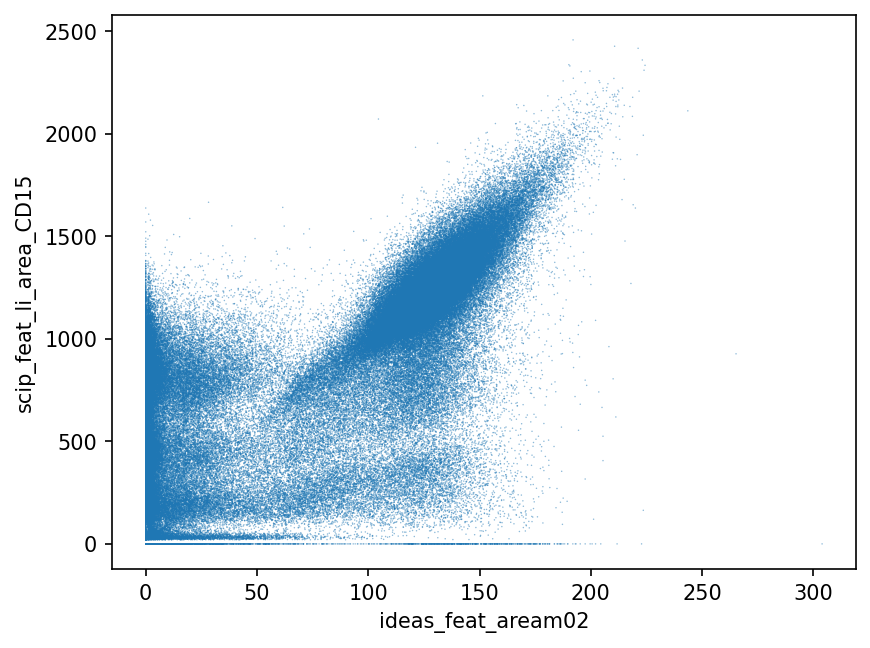

In [86]:
compare_features(df_joined, "ideas_feat_aream02", "scip_feat_li_area_CD15")

<AxesSubplot:xlabel='ideas_feat_aream03', ylabel='scip_feat_li_area_Siglec8'>

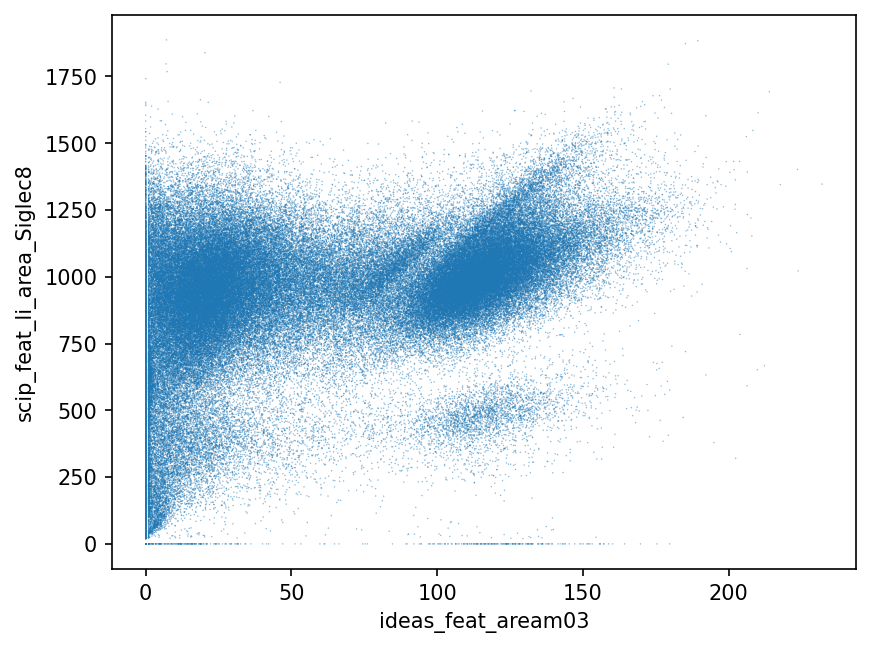

In [87]:
compare_features(df_joined, "ideas_feat_aream03", "scip_feat_li_area_Siglec8")

<AxesSubplot:xlabel='ideas_feat_perimeterm01', ylabel='scip_feat_li_perimeter_BF1'>

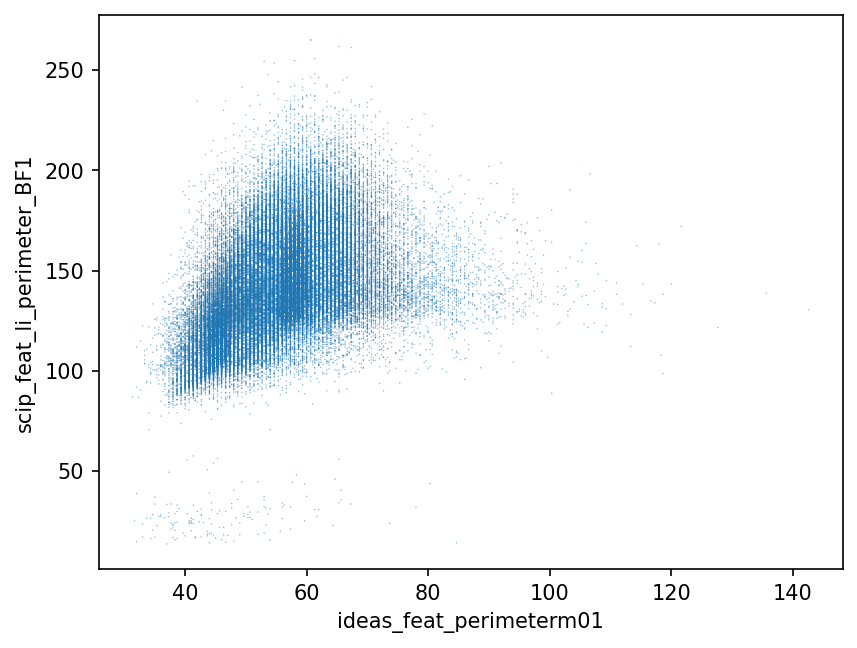

In [88]:
compare_features(df_joined, "ideas_feat_perimeterm01", "scip_feat_li_perimeter_BF1")

<AxesSubplot:xlabel='ideas_feat_majoraxism06', ylabel='scip_feat_li_major_axis_length_SSC'>

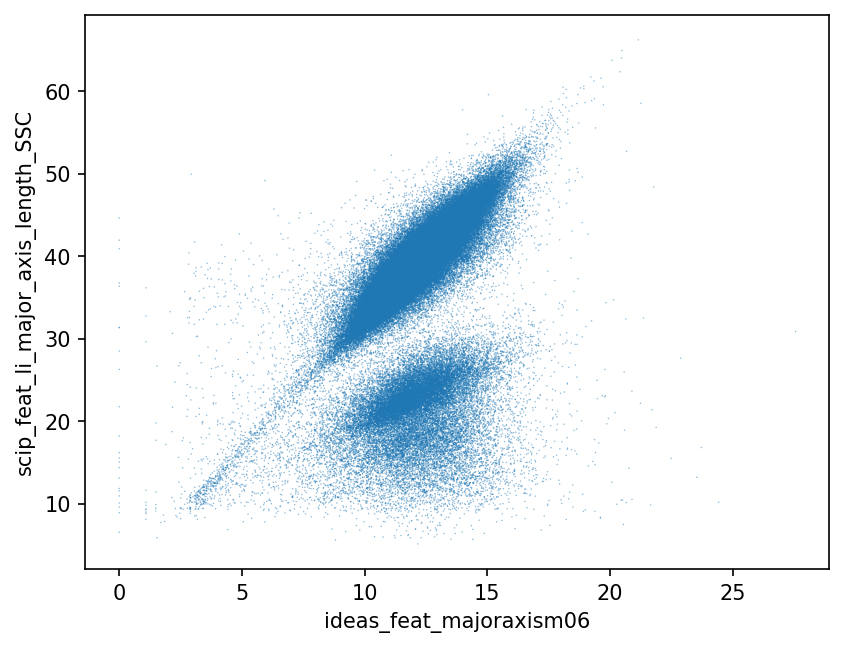

In [89]:
compare_features(df_joined, "ideas_feat_majoraxism06", "scip_feat_li_major_axis_length_SSC")

<AxesSubplot:xlabel='ideas_feat_perimeterm01', ylabel='scip_feat_li_perimeter_crofton_BF1'>

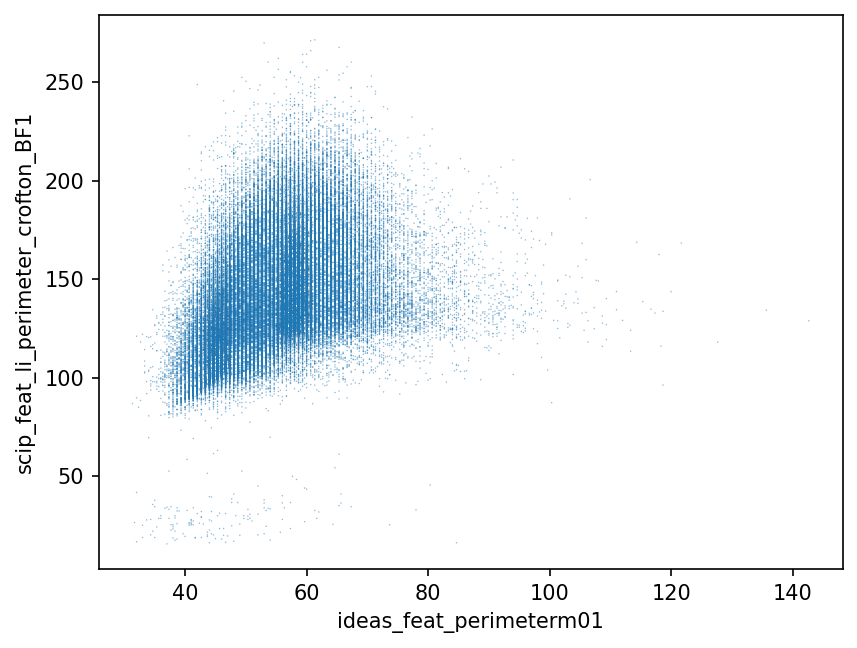

In [91]:
compare_features(df_joined, "ideas_feat_perimeterm01", "scip_feat_li_perimeter_crofton_BF1")

<AxesSubplot:xlabel='ideas_feat_aream07', ylabel='scip_feat_li_area_CD3'>

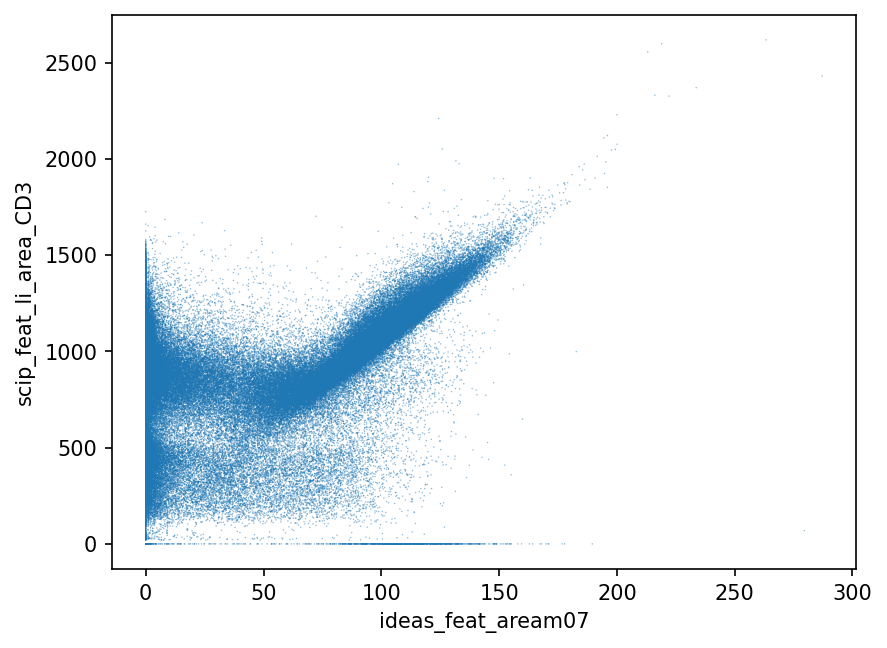

In [92]:
compare_features(df_joined, "ideas_feat_aream07", "scip_feat_li_area_CD3")

### Intensity features

<AxesSubplot:xlabel='ideas_feat_rawintensitym06ssc', ylabel='scip_feat_li_sum_SSC'>

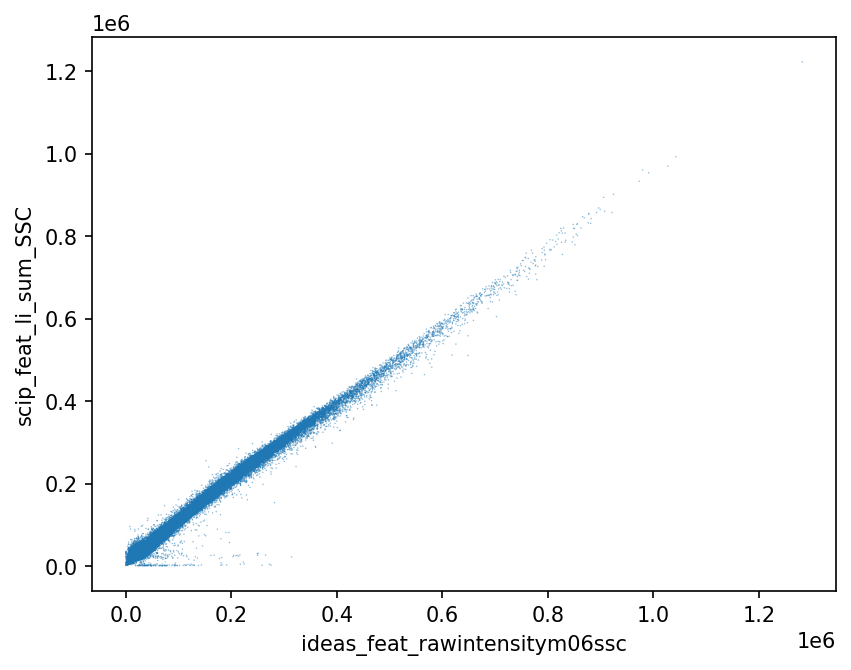

In [93]:
compare_features(df_joined, "ideas_feat_rawintensitym06ssc", "scip_feat_li_sum_SSC")

<AxesSubplot:xlabel='ideas_feat_intensitym01bf420nm480nm', ylabel='scip_feat_li_bgcorr_sum_BF1'>

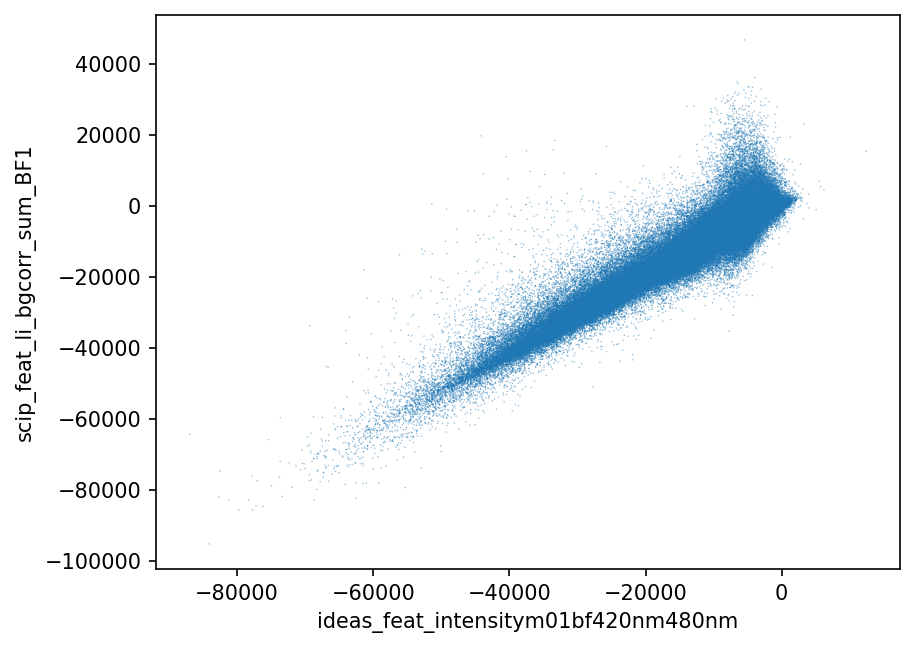

In [94]:
compare_features(df_joined, "ideas_feat_intensitym01bf420nm480nm", "scip_feat_li_bgcorr_sum_BF1")

<AxesSubplot:xlabel='ideas_feat_rawintensitym01bf420nm480nm', ylabel='scip_feat_li_sum_BF1'>

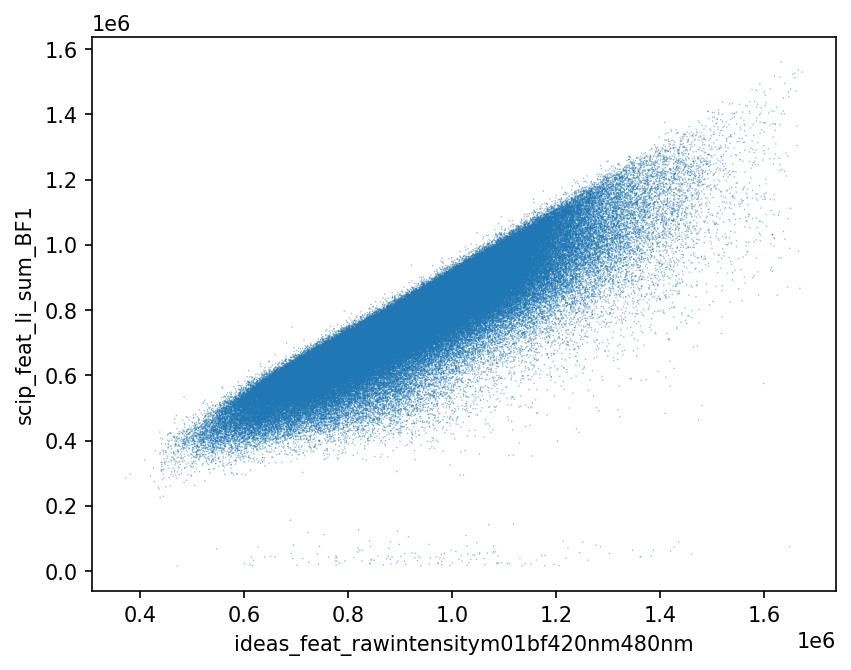

In [95]:
compare_features(df_joined, "ideas_feat_rawintensitym01bf420nm480nm", "scip_feat_li_sum_BF1")

<AxesSubplot:xlabel='ideas_feat_intensitymccd15fitc', ylabel='scip_feat_li_combined_bgcorr_sum_CD15'>

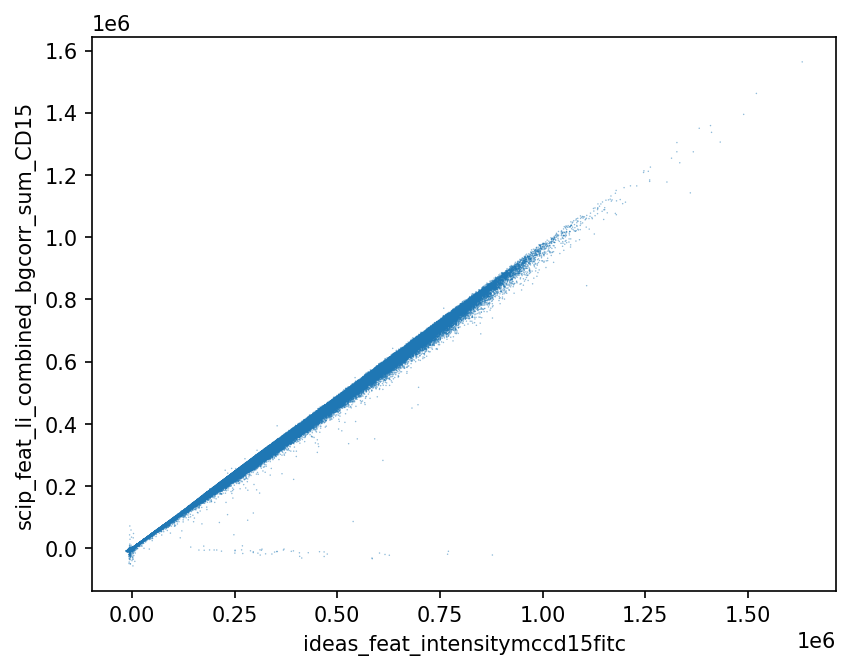

In [96]:
compare_features(df_joined, "ideas_feat_intensitymccd15fitc", "scip_feat_li_combined_bgcorr_sum_CD15")

<AxesSubplot:xlabel='ideas_feat_intensitymccd3bv421', ylabel='scip_feat_li_combined_bgcorr_sum_CD3'>

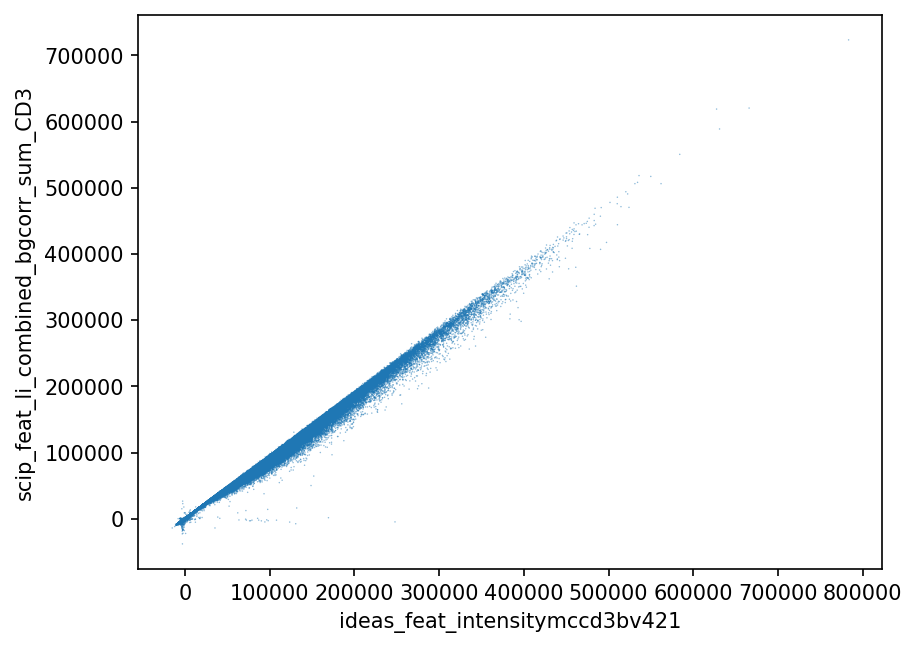

In [97]:
compare_features(df_joined, "ideas_feat_intensitymccd3bv421", "scip_feat_li_combined_bgcorr_sum_CD3")